#Case Study: House Price

The dataset represents a synthetic collection of house-related features and their corresponding prices. It contains 1000 samples, with each sample having the following features:

- Size: The size of the house
- Bedrooms: The number of bedrooms in the house
- Bathrooms: The number of bathrooms in the house
- Location: A feature representing the location of the house
- YearBuilt: The year the house was built
- RoofType: The type of roof on the house
- Price: The price of the house

#Nuha Alanezi
#nuhaalanezi7@gmail.com


## Load and Explore the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/house_prices_dataset.csv')
df

,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
0,-0.325611,0.257199,0.007880,-0.164335,-0.240665,0.212093,-16.984913
1,-0.202193,1.277665,0.547097,-0.217681,-0.591571,1.098777,24.031693
2,-2.153731,0.975713,0.685858,0.446982,0.000756,-0.638586,57.305959
3,-0.939880,-1.304470,0.366598,-0.513867,0.669673,-1.059214,-81.049670
4,-0.570351,1.223083,0.352505,-1.820603,-0.258854,0.270057,-127.396000
...,...,...,...,...,...,...,...
995,NaN,0.689164,-0.273729,0.149598,-0.683634,0.097827,13.634300
996,-0.564079,-1.021233,0.243801,-1.280304,0.708356,0.872457,-138.161669
997,-0.981166,-1.725807,1.194109,-0.464404,-0.677565,0.462061,-94.896020
998,NaN,1.158596,0.963376,0.822060,-0.820682,1.896793,133.087713


Let's explore the dataset to better know what we're dealing with

In [ ]:
# Question 1:
# Get the shape of the dataset
print("Shape of the dataset:", df.shape)
# Check the data types of the columns
print("Data types of the columns:")
print(df.dtypes)

Shape of the dataset: (1000, 7)
Data types of the columns:
Size         float64
Bedrooms     float64
Bathrooms    float64
Location     float64
YearBuilt    float64
RoofType     float64
Price        float64
dtype: object


## Deeper Exploration

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question 2:
# Check for missing values
print("Missing values:\n", df.isnull().sum())



# Drop rows with NaN values
df = df.dropna()


# Check for missing values again
print("Missing values:\n", df.isnull().sum())

Missing values:
 Size         200
Bedrooms     100
Bathrooms      0
Location       0
YearBuilt      0
RoofType       0
Price          0
dtype: int64
Missing values:
 Size         0
Bedrooms     0
Bathrooms    0
Location     0
YearBuilt    0
RoofType     0
Price        0
dtype: int64


This function sns.pairplot() creates scatter plots for each numerical feature (Size, Bedrooms, Bathrooms, Location, YearBuilt) against the target variable (Price).

             Size    Bedrooms   Bathrooms    Location   YearBuilt    RoofType  \
count  717.000000  717.000000  717.000000  717.000000  717.000000  717.000000   
mean    -0.009047   -0.004061    0.010131   -0.063866   -0.001070    0.046658   
std      1.033124    0.972833    1.010353    1.007802    1.007022    0.988455   
min     -3.176704   -2.635748   -3.019512   -3.241267   -2.991136   -2.848543   
25%     -0.667780   -0.627734   -0.668143   -0.762519   -0.656894   -0.589452   
50%     -0.020099   -0.013838    0.033903   -0.054894    0.019344    0.040592   
75%      0.604515    0.642723    0.652323    0.632408    0.673181    0.665369   
max      3.926238    3.098299    3.243093    3.152057    3.193108    3.852731   

            Price  
count  717.000000  
mean    -5.801303  
std    106.479727  
min   -378.482528  
25%    -77.265468  
50%     -4.906227  
75%     66.442292  
max    352.382735  


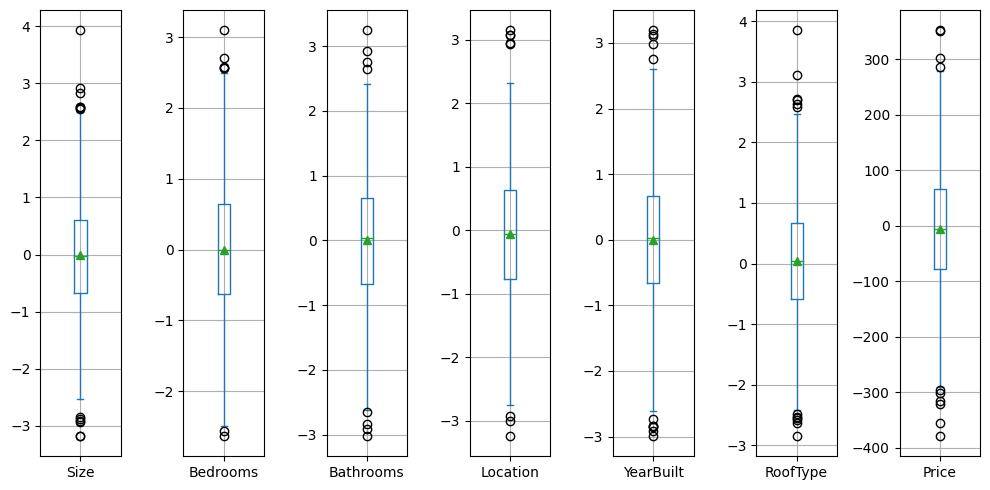

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Question 3:
# Create plots to better understand the data
print(df.describe())

ax = df.plot.box(figsize=(10, 5), showmeans=True, grid=True, subplots=True)
plt.tight_layout()
plt.show()


       Size  Bedrooms  Bathrooms  Location  YearBuilt  RoofType       Price
0 -0.325611  0.257199   0.007880 -0.164335  -0.240665  0.212093  -16.984913
1 -0.202193  1.277665   0.547097 -0.217681  -0.591571  1.098777   24.031693
2 -2.153731  0.975713   0.685858  0.446982   0.000756 -0.638586   57.305959
3 -0.939880 -1.304470   0.366598 -0.513867   0.669673 -1.059214  -81.049670
4 -0.570351  1.223083   0.352505 -1.820603  -0.258854  0.270057 -127.396000


array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>],
       [<Axes: title={'center': 'Location'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'RoofType'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

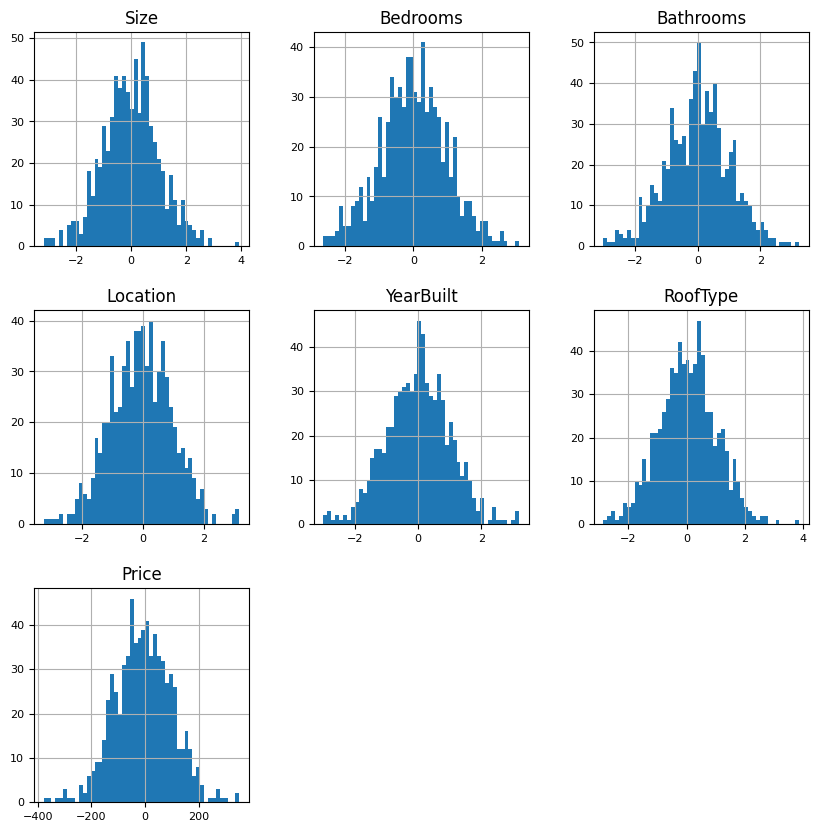

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
print(df_num.head())

df_num.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

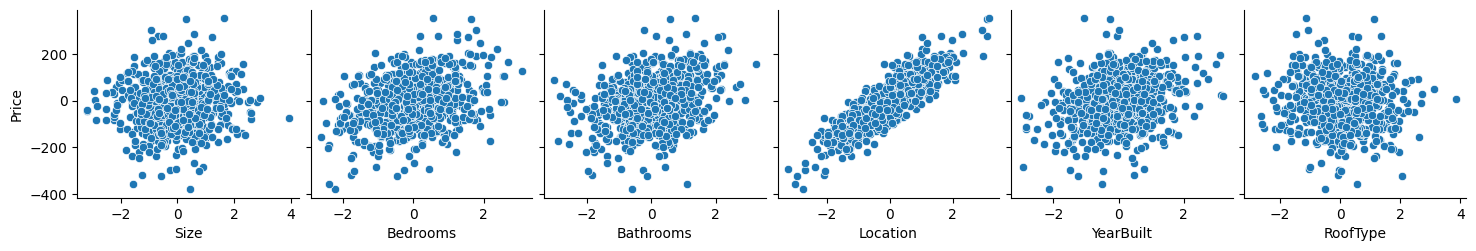

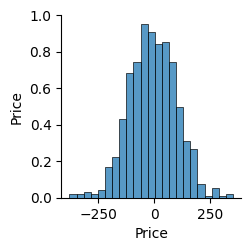

In [ ]:
for i in range(0, len(df_num.columns), 6):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+6],
                y_vars=['Price'])

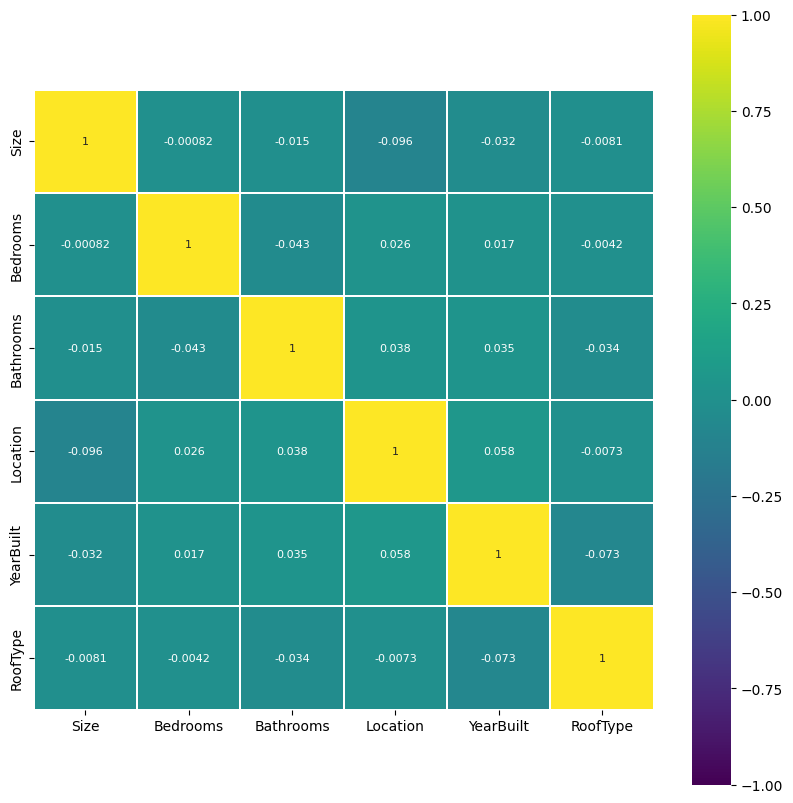

In [ ]:
corr = df_num.drop('Price', axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

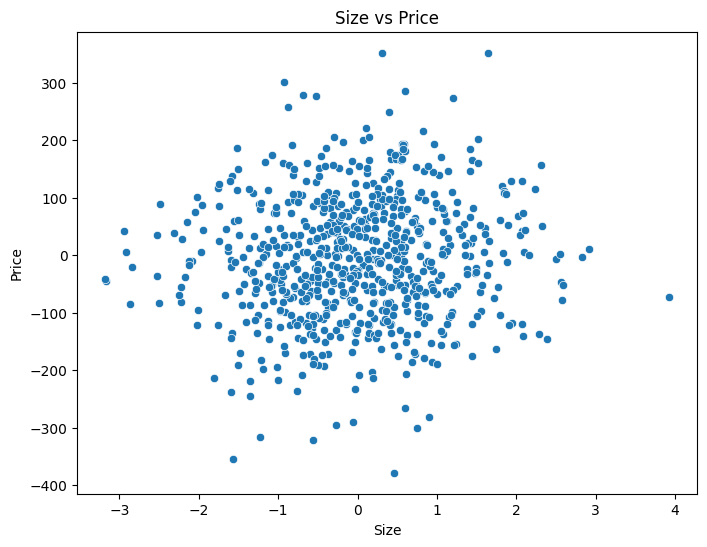

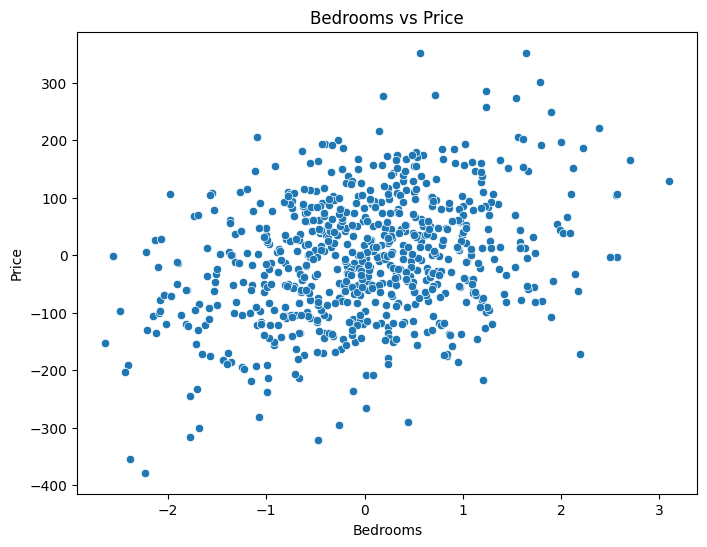

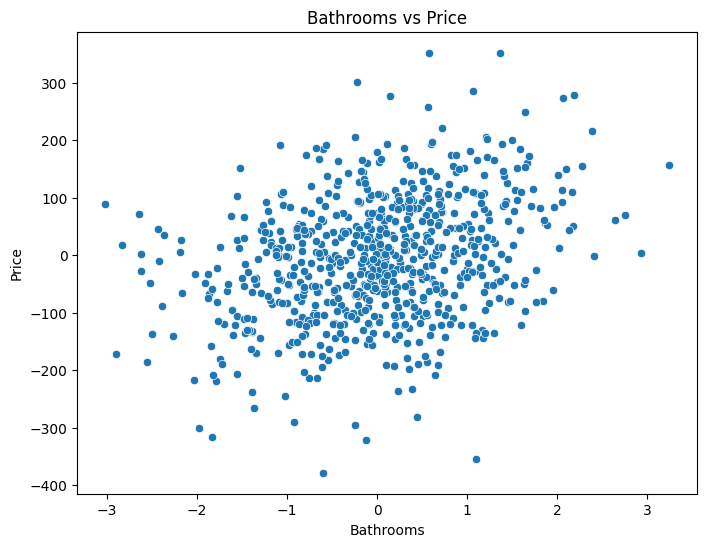

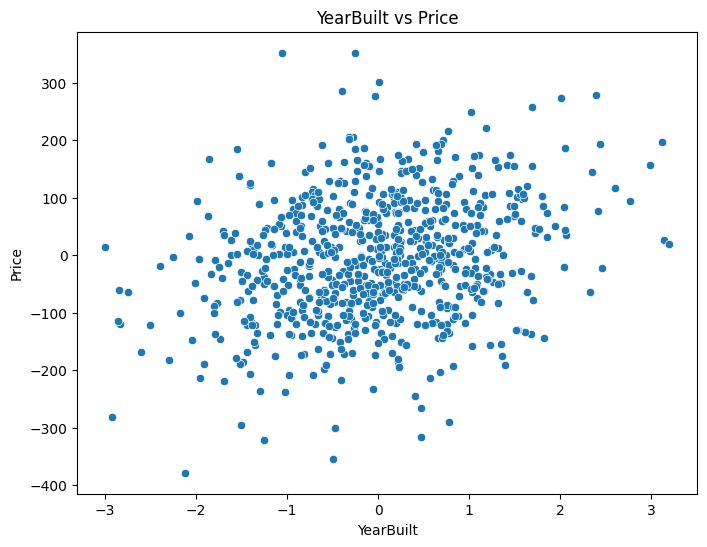

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical features for individual scatter plots
numerical_features = ['Size', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']

# Create individual scatter plots for each numerical feature against the target variable
for feature in numerical_features[:-1]:  # Exclude 'Price' from the loop
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='Price', data=df)
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()


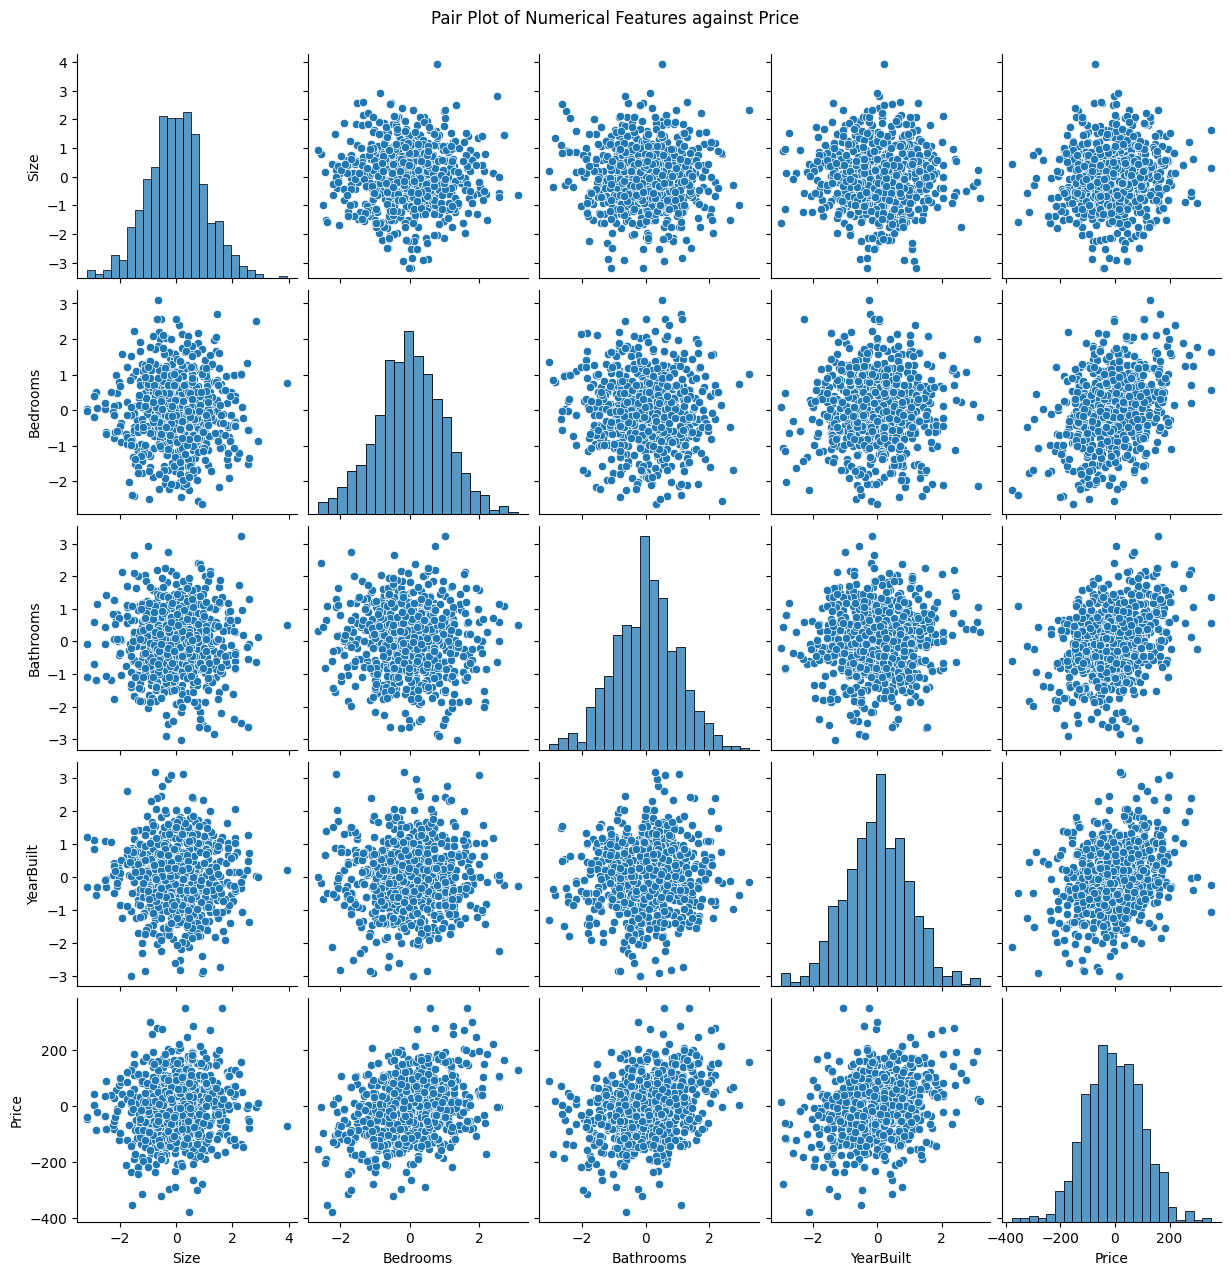

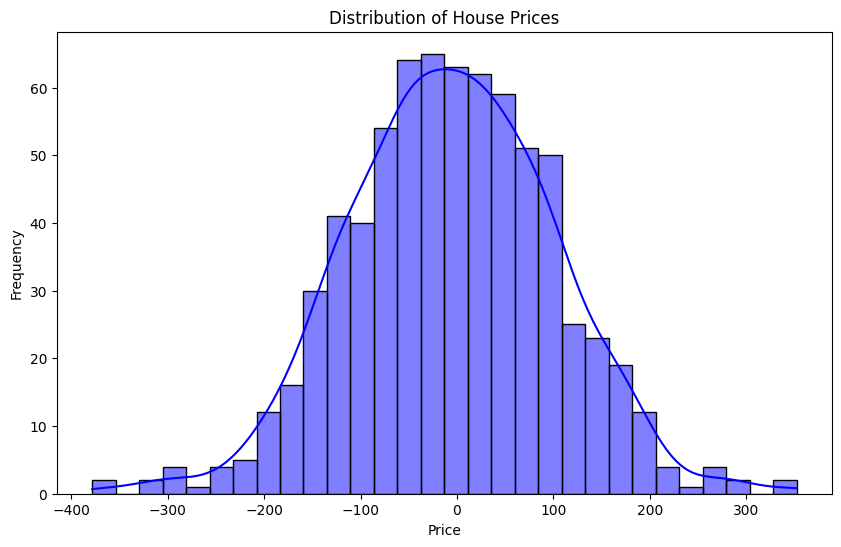

In [ ]:

# Pair plot for numerical features against the target variable 'Price'
numerical_features = ['Size', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features against Price', y=1.02)
plt.show()

# Plot the distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


## Predictive Modeling using Linear Regression

- Split the Data
- Train a Linear Regressor
- Evaluate it on the test set using any metric of your choice

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Question 4:
# Split the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Question 5:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics

print(f'the R2 score is: {r2}, The mean absolute error is: {mae}, mean squared error is: {mse}')

the R2 score is: 0.9999788915641995, The mean absolute error is: 0.3948286545533575, mean squared error is: 0.2456622575795603


In [ ]:
#Extra_Exercise
#Inputs_End_User(ML)
#End_User_predict
user_input_size = float(input("Enter the size of the house: "))
user_input_bedrooms = float(input("Enter the number of bedrooms: "))
user_input_bathrooms = float(input("Enter the number of bathrooms: "))
user_input_location = float(input("Enter the location of the house: "))
user_input_year_built = float(input("Enter the year the house was built: "))
user_input_roof_type = float(input("Enter the type of roof: "))
pricepred=model.predict([[user_input_size,user_input_bedrooms,user_input_bathrooms,user_input_location,user_input_year_built,user_input_roof_type]])
print("House Price Predication",pricepred)

Enter the size of the house: 0.543390827871809
Enter the number of bedrooms: 1.53448210179451
Enter the number of bathrooms: -0.459764615830476
Enter the location of the house: 0.00314772690632663
Enter the year the house was built: 1.12237421870315
Enter the type of roof: 1.22999036843868
House Price Predication [70.92672224]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Predictive Modeling using Logistic Regression

To utilize the same dataset for logistic regression, you need to transform the problem into a classification task. For example, you can introduce a threshold and classify the houses as "expensive" or "affordable" based on whether their prices are above or below the threshold. You can choose the threshold based on your dataset or specific requirements.

Convert the target variable into a binary variable (0 or 1) representing the classes (e.g., 0 for affordable, 1 for expensive). Then, train a logistic regression model using the same features to classify houses as either affordable or expensive based on the chosen threshold.

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

# Question 6:

# Set the median as a threshold to classify houses as "expensive" or "affordable"
threshold = df['Price'].median()

# Transform the problem into a classification task
df["Class"] = df["Price"].apply(lambda x: 1 if x >= threshold else 0)
df = df.drop("Price", axis=1)

# Split the data into features (X) and target variable (y)
X = df.drop("Class", axis=1)
y = df["Class"]
y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)



# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:", cm)


Accuracy: 0.9861111111111112
Precision: 0.9864864864864865
Recall: 0.9864864864864865
F1 score: 0.9864864864864865
Confusion matrix: [[69  1]
 [ 1 73]]


<ipython-input-87-b916d297eabf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"] = df["Price"].apply(lambda x: 1 if x >= threshold else 0)


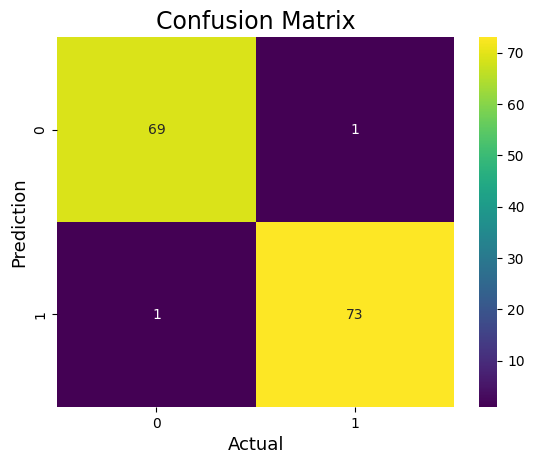

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap='viridis')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [ ]:
#Extra_Exercise
#Inputs_End_User(LR)
#End_User_predict
# User input for house features
user_input_size = float(input("Enter the size of the house: "))
user_input_bedrooms = float(input("Enter the number of bedrooms: "))
user_input_bathrooms = float(input("Enter the number of bathrooms: "))
user_input_location = float(input("Enter the location of the house: "))
user_input_year_built = float(input("Enter the year the house was built: "))
user_input_roof_type = float(input("Enter the type of roof: "))
user_input_price = float(input("Enter the house price: "))

# Transform the user input into a DataFrame with the same features
user_input_df = pd.DataFrame({
    'Size': [user_input_size],
    'Bedrooms': [user_input_bedrooms],
    'Bathrooms': [user_input_bathrooms],
    'Location': [user_input_location],
    'YearBuilt': [user_input_year_built],
    'RoofType': [user_input_roof_type],
    'Price': [user_input_price]
})

# Use the trained classifier to predict the class for the user input
user_input_class = classifier.predict(user_input_df.drop("Price", axis=1))

# Display the result
if user_input_class == 1:
    print("Predicted class: Expensive")
else:
    print("Predicted class: Affordable")



Enter the size of the house: -1.14879403515865
Enter the number of bedrooms: -1.0872459388628
Enter the number of bathrooms: 0.679373282956503
Enter the location of the house: 0.666312500909211
Enter the year the house was built: -1.08582512888518
Enter the type of roof: 0.462591292853951
Enter the house price: 2.09744545399695
Predicted class: Expensive
